# Enzyme Variation and Drug Metabolism

**Created and developed by [Suparna Kompalli](https://www.linkedin.com/in/suparna-kompalli-79463b229/) and [Brandon Concepcion](https://www.linkedin.com/in/brandonconcepcion/), with assistance and supervision by [Jonathan Ferrari](https://www.linkedin.com/in/jonathanferrari/), [Professor Darcie McClelland](https://www.linkedin.com/in/darcie-mcclelland-descalzo-56796b1b/), and [Professor Eric Van Dusen](https://www.linkedin.com/in/ericvd/) as part of our work with UC Berkeley's [College of Computing, Data Science and Society](https://cdss.berkeley.edu/) as well as [El Camino College](https://www.elcamino.edu/)**

## **Enzyme Bioinformatics**

Welcome! In this notebook, we will be exploring how genetic variation in CYP2D6 (a liver enzyme) affects how patients metabolize common drugs like codeine or antidepressants. CYP2D6 plays a critical role in metabolizing various drugs. Variations in the CYP2D6 gene can affect how effectively a person processes certain medications. These variations can lead to adverse drug reactions or treatment failures if not accounted for in personalized medicine.

### The Objective:

Explore the genetic variation in the CYP2D6 gene and how it affects drug metabolism, specifically in terms of:
- Metabolizer phenotypes (e.g., poor metabolizer, extensive metabolizer, ultrarapid metabolizer).
- Drug metabolism outcomes for patients using drugs like codeine, tamoxifen, or antidepressants.

Run the cell below to import any neccesary libraries for this notebook.

In [1]:
from utils import *

<hr style="border: 2px solid #003262">
<hr style="border: 2px solid #C9B676">

The data we will be using today is from [PharmGKB](https://www.pharmgkb.org/). PharmGKB (Pharmacogenomics Knowledgebase) is a free, publicly available resource that curates information about how genetic variation affects drug response. It's a key resource for researchers and clinicians working in pharmacogenomics — the study of how genes influence the way people respond to medications.

Today we will be using their database of Variant Associations to study the association between CYP2D6 and drug metabolization. This dataset we are using contains the associations in which the variant affects a drug dose, response, metabolism, etc.

Let's get a better idea of what data we are looking at. 

Here's a short description of the **features** we are going to be focusing on:

- **Gene**: HGNC symbol for the gene involved in the association.
- **Variant/Haplotypes**: dbSNP rsID or haplotype(s) involved in the association. In some cases, an association is based on a gene phenotype group such as "poor metabolizers" or "intermediate activity". In these cases, the gene phenotype is found in this field.
- **Drug(s)**: The drug(s) involved in the association. 
- **Phenotype Category**: Options are "efficacy", "toxicity", "dosage", "metabolism/PK", "PD", "other".
- **Significance**: The significance of the association as stated by the author; options are [yes, no, not stated].
- **Alleles**: The basis for comparison in the annotation. In this field, there may be a variant, one or more haplotypes grouped together, one or more genotypes grouped together or one or more diplotypes grouped together. 
- **Metabolizer types**: This field contains the gene phenotype group, if applicable. I.e., if the association is based on a gene phenotype group such as "poor metabolizers", or if the association is based on individual genotypes that were combined into a gene phenotype group.
- **Population types**: This field indicates the type of population in which the association was studied. There are multiple options including, but not limited to, "in healthy individuals", "in children", "in women". The studied population can be further described in the "Population Phenotypes or diseases" field, in which case the "Population types" field will in with the word "with", such as "in children with".
- **Is/Is Not associated**: This field indicates whether or not an association was found.
- **Notes**: Free text field for notes added by the curator.

You can find the full descriptions [here](https://www.pharmgkb.org/page/downloadVariantAnnotationsHelp). 

Run the cell below to explore what our data looks like in the table.

In [2]:
df = load_data()

,PMID,Gene,Variant/Haplotypes,Drug(s),Phenotype Category,Significance,Alleles,Metabolizer types,Population types,Is/Is Not associated,Notes
11397,37763120,CYP2D6,rs1135840,fluoxetine,Metabolism/PK,yes,C,NaN,in healthy individuals,Associated with,"""The CYP2D6*10 haplotype, related to decreased..."
11401,37763120,CYP2D6,rs1065852,fluoxetine,Metabolism/PK,yes,A,NaN,in healthy individuals,Associated with,"""The CYP2D6*10 haplotype, related to decreased..."
11467,37307170,CYP2D6,rs28371738,alpha-hydroxymetoprolol,Metabolism/PK,yes,A,NaN,NaN,Associated with,"in a large biobank of ""“real-life” polymedicat..."
12158,34380995,CYP2D6,rs1065852,methadone,Dosage,no,A,NaN,in people with,Not associated with,This variant is referred to as CYP2D6*10 in th...
12446,22354160,CYP2D6,rs3892097,nevirapine,"Toxicity, Metabolism/PK",no,T,NaN,in people with,Not associated with,NaN


### Visualizing Frequency

Let's start off by analyzing some **bar charts.** The following bar charts displays the counts for each category within three columns. These help us get a better idea of how our data is *distributed.* Below we can see the top 12 categories for each feature. 

/Users/suparna/Desktop/modules/ecc-biology/enzymes/utils.py:42: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


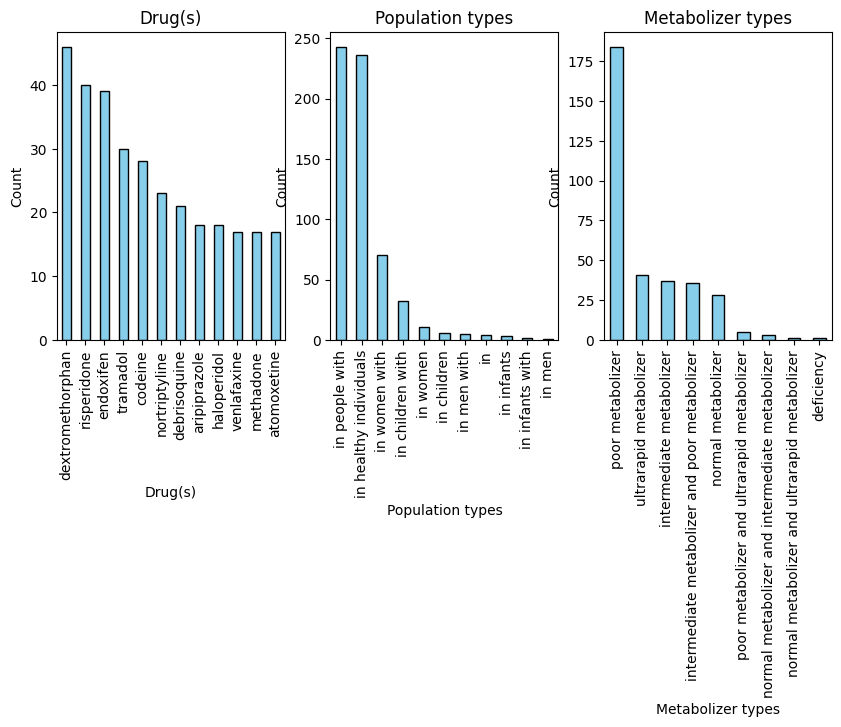

In [3]:
display_data_counts()

The above visuals help us get a better idea of what categories make up the majority of our data. But if we want to see what features are useful in analyzing drug metabolism, we need to see how these features interact with each other.

Heatmaps use color coding to show the distribution across the table visually. In a table, this is useful for highlight patterns, trends, and outliers. The heatmap below tells shows us the distribution for Phenotype Category by Population Types. 

This visualization is *interactive*. You can change the dependent column using the dropdown titles *Feature*. Since some of these columns have many categories, you can use the slider labeled *Top K* to vizualize only the *K* most frequent categories. 

In [4]:
display_heatmap()

Output()

Phenotypes are the "bridge" between genotype and treatment outcomes. A variant alone doesn’t tell you much unless you know how it expresses itself. Each row in our dataset represents a specific association between a genetic variant and a phenotype (observable trait), and the "Phenotype Category" feature classifies what kind of effect or interaction that variant has, particularly in relation to drugs or biological response. 

Here's how each category relates to our dataset.
- Efficacy: The variant influences how well a drug works for a particular individual.
- Toxicity: The variant is linked to an increased risk of side effects or adverse reactions.
- Dosage: The variant affects how much of a drug should be given for safe and effective treatment.
- Metabolism/PK: The variant affects how the body processes the drug — including absorption, distribution, metabolism, or excretion.
- PD (Pharmacodynamics): The variant changes how the drug interacts with its target in the body, affecting its action.


**Question 1:** What is one observation you noticed in the heatmaps for *Population Types* and *Metabolizer Types.* Does this observation change based on the value of *K*? What does this tell you overall about drug metabolism of CYP2D6?

In [9]:
widgets.Textarea(placeholder = "Your answer here")

Textarea(value='', placeholder='Your answer here')

Let's now explore how the distribution of *Phenotype Category* changes across *Population Type* in a diffent way. Run the cell below to compare the distribution of Phenotype Category in each population type. 

In [5]:
display_population_types()

Output()

**Question 2:** In the context of drug metabolism of CYP2D6, what is one conclusion you can draw using the above bar charts?

In [6]:
widgets.Textarea(placeholder = "Your answer here")

Textarea(value='', placeholder='Your answer here')

Now we are going to build a simple model to see with what accuracy we can predict an association between drug metabolism and CY2PD6 using the above features we explored. 

The model we will be using is a Support Vector Machine (SVM). This model is good at handling high dimensional data with smaller sample sizes. This model is better at handling *sparse* features - these are columns where majority of the values are null or zero. 

Run the cell below to see our accuracy using some of the above features. 

In [9]:
X = df[['Variant/Haplotypes' ,'Drug(s)', 'Phenotype Category', 'Alleles', 'Metabolizer types',
         'Population types', 'Population Phenotypes or diseases']]
y = df['Is/Is Not associated']

run_SVM(X, y)

                     precision    recall  f1-score   support

    Associated with       0.84      0.98      0.90       120
Not associated with       0.50      0.08      0.14        25

           accuracy                           0.83       145
          macro avg       0.67      0.53      0.52       145
       weighted avg       0.78      0.83      0.77       145



**Question 3:** Add or remove feature(s) to the **X** dataframe and run the cell again. How did your change affect the accuracy? Why do you think the change helped/hurt your accuracy?

*Reminder: more features can be found [here](https://www.pharmgkb.org/page/downloadVariantAnnotationsHelp).*

In [12]:
widgets.Textarea(placeholder = "Your answer here")

Textarea(value='', placeholder='Your answer here')

### Reflection

**Question 4:**
In the case of CYP2D6, a key enzyme involved in drug metabolism, how might feedback inhibition regulate its activity in response to the accumulation of certain metabolites? Discuss the potential consequences if feedback inhibition was not properly functioning in the context of drug metabolism.

In [13]:
widgets.Textarea(placeholder = "Your answer here")

Textarea(value='', placeholder='Your answer here')

**Question 5:** Why is it important for the body to tightly regulate the activity of enzymes like CYP2D6? How would chemical chaos impact a patient's response to drugs if CYP2D6 were overactive or underactive?

In [14]:
widgets.Textarea(placeholder = "Your answer here")

Textarea(value='', placeholder='Your answer here')

<hr style="border: 2px solid #003262">
<hr style="border: 2px solid #C9B676">

## Congratulations! 

Leo 🦁 congratulates you on finishing the Enzymes notebook!

<img src="leo.png" style="width: 20%;">